# Implement Gradient Descent For Neural Network (or Logistic Regression)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [23]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

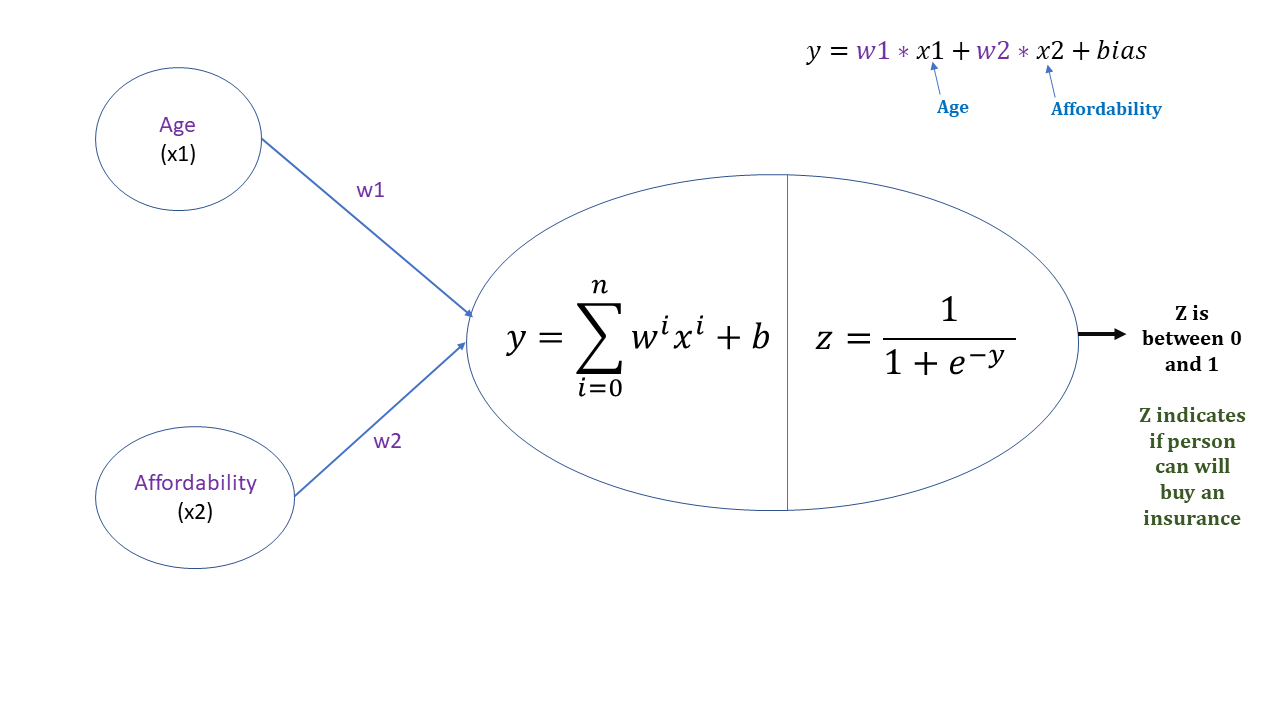

In [24]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000


D:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5000 - l

In [49]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [50]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)

In [51]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [52]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

In [53]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [54]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


In [55]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

C:\Users\OM\AppData\Local\Temp\ipykernel_12928\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.705484819775958

In [56]:
prediction_function(.18, 1)

C:\Users\OM\AppData\Local\Temp\ipykernel_12928\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.35569571637887243

In [57]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [58]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [65]:
# def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
#     w1 = w2 = 1
#     bias = 0
#     rate = 0.5
#     n = len(age)
#     for i in range(epochs):
#         weighted_sum = w1 * age + w2 * affordability + bias
#         y_predicted = sigmoid_numpy(weighted_sum)
#         loss = log_loss(y_true, y_predicted)

#         w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
#         w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

#         bias_d = np.mean(y_predicted-y_true)
#         w1 = w1 - rate * w1d
#         w2 = w2 - rate * w2d
#         bias = bias - rate * bias_d

#         print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

#         if loss<=loss_thresold:
#             break

#     return w1, w2, bias

In [66]:
# gradient_descaent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

In [59]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [60]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.2007131317600317, w2:1.2941584023238906, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689077, w2:1.369689549157275, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917
Final weights and bias: w1: 5.051047623653049, w2: 

In [61]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

In [62]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [63]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

In [64]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)